# 图像特效-灰度化

In [4]:
#coding:utf-8
%matplotlib  inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
src = cv2.cvtColor(cv2.imread('../datas/f4.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.imread('../datas/f2.jpg',0)

In [6]:
def gray(src,method='average'):
    srcf = src.astype(np.float32)
    dst = np.zeros((srcf.shape[0],srcf.shape[1]),dtype=srcf.dtype)
    r = srcf[:,:,0]
    g = srcf[:,:,1]
    b = srcf[:,:,2]
    eps = 1.0e-5
    if method == 'average':
        val = (r + g + b) / 3.0
        dst = val
    elif method == 'weighted_average':
        val = 0.3 * r + 0.59 * g + 0.11 * b
        dst = val
    elif method == 'maxmum':
        dst = np.maximum(np.maximum(r,g),b)
    else:
        raise ValueError('unsupport method:%s' % method)
    dst[dst < 0] = 0
    dst[dst > 255] = 255
    return dst.astype(np.uint8)

Text(0.5,1,'Gray:Average')

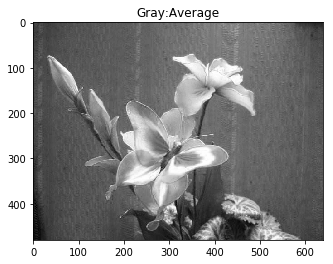

In [9]:
dst1 = gray(src)
plt.imshow(dst1,'gray')
plt.title('Gray:Average')

Text(0.5,1,'Gray:Weighted Average')

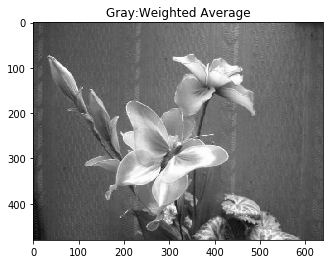

In [11]:
dst2 = gray(src,'weighted_average')
plt.imshow(dst2,'gray')
plt.title('Gray:Weighted Average')

Text(0.5,1,'Gray:Maximum')

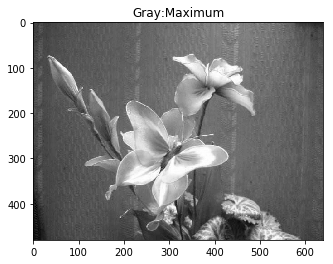

In [12]:
dst3 = gray(src,'weighted_average')
plt.imshow(dst3,'gray')
plt.title('Gray:Maximum')

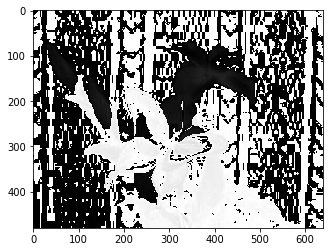

In [15]:
plt.imshow(np.abs(dst1-dst3),'gray')